<a href="https://colab.research.google.com/github/victoralmeida428/Data-Science/blob/main/Deep_Learning_Bicicleta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
bike = pd.read_csv('bicicletas.csv')
bike['datas'] = pd.to_datetime(bike['datas'])

In [7]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

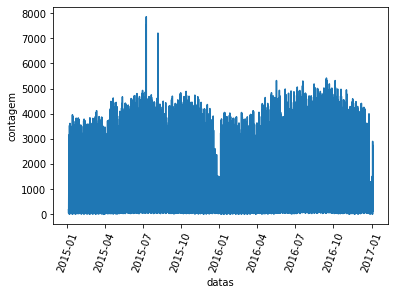

In [8]:
sns.lineplot(x = 'datas', y = 'contagem', data = bike)
plt.xticks(rotation=70)

In [9]:
sc = StandardScaler()
sc.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [10]:
y = sc.transform(bike['contagem'].values.reshape(-1,1))

In [11]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike)-tamanho_treino
y_treino = y[:tamanho_treino]
y_teste = y[tamanho_treino:]

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

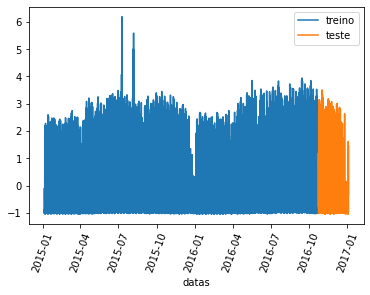

In [14]:
sns.lineplot(x = 'datas', y = y_treino[:,0], data=bike[:tamanho_treino], label = 'treino')
sns.lineplot(x = 'datas', y = y_teste[:,0], data = bike[tamanho_treino:], label = 'teste')
plt.xticks(rotation=70)

In [15]:
def separa_dados(vetor, npassos):
  x_novo, y_novo = [],[]
  for i in range(npassos, vetor.shape[0]):
    x_novo.append(list(vetor.loc[i - npassos: i - 1]))
    y_novo.append(vetor.loc[i])
  x_novo, y_novo = np.array(x_novo), np.array(y_novo)
  return x_novo, y_novo

In [16]:
vetor = pd.DataFrame(y_treino)[0]

In [25]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 10)

In [27]:
regressor = Sequential()

In [28]:
regressor.add(Dense(8, input_dim = 10 , kernel_initializer = 'random_uniform' , 
                    activation = 'linear', use_bias = True))
regressor.add(Dense(64, kernel_initializer = 'random_uniform',
                    activation = 'sigmoid', use_bias = True))
regressor.add(Dense(1, kernel_initializer = 'random_uniform',
                    activation = 'linear', use_bias = True ))

In [29]:
regressor.compile(loss = 'mean_squared_error', optimizer='adam')

In [30]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 64)                576       
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 729
Trainable params: 729
Non-trainable params: 0
_________________________________________________________________


In [31]:
regressor.fit(xtreino_novo, ytreino_novo, epochs = 200)

Epoch 1/200
490/490 [==============================] - 1s 2ms/step - loss: 0.5071
Epoch 2/200
490/490 [==============================] - 1s 2ms/step - loss: 0.2029
Epoch 3/200
490/490 [==============================] - 1s 2ms/step - loss: 0.1874
Epoch 4/200
490/490 [==============================] - 1s 2ms/step - loss: 0.1846
Epoch 5/200
490/490 [==============================] - 1s 2ms/step - loss: 0.1829
Epoch 6/200
490/490 [==============================] - 1s 2ms/step - loss: 0.1812
Epoch 7/200
490/490 [==============================] - 1s 2ms/step - loss: 0.1800
Epoch 8/200
490/490 [==============================] - 1s 2ms/step - loss: 0.1797
Epoch 9/200
490/490 [==============================] - 1s 2ms/step - loss: 0.1797
Epoch 10/200
490/490 [==============================] - 1s 2ms/step - loss: 0.1791
Epoch 11/200
490/490 [==============================] - 1s 2ms/step - loss: 0.1799
Epoch 12/200
490/490 [==============================] - 1s 2ms/step - loss: 0.1779
Epoch 13/200


In [49]:
y_treino_predict = regressor.predict(xtreino_novo)

55/55 [==============================] - 0s 3ms/step


In [34]:
vetor_teste = pd.DataFrame(y_teste)[0]

In [36]:
xteste_novo, yteste_novo = separa_dados(vetor_teste, 10)

In [50]:
y_teste_predict = regressor.predict(xteste_novo)

55/55 [==============================] - 0s 2ms/step


In [60]:
resultado = pd.DataFrame(y_teste_predict)[0]
resultado.shape[0]

1732

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

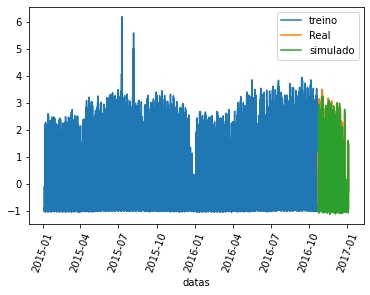

In [68]:
sns.lineplot(x = 'datas', y = y_treino[:,0], data=bike[:tamanho_treino], label = 'treino')
sns.lineplot(x = 'datas', y = y_teste[:,0], data = bike[tamanho_treino:], label = 'Real')
sns.lineplot(x = 'datas', y = resultado.values, data=bike[len(y_treino)+10:], label = 'simulado')
plt.xticks(rotation=70)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

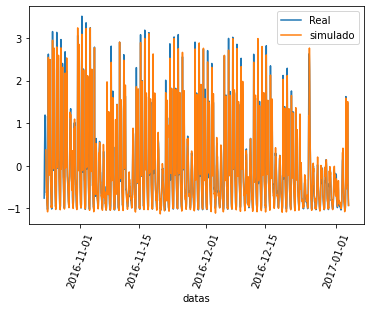

In [69]:
sns.lineplot(x = 'datas', y = y_teste[:,0], data = bike[tamanho_treino:], label = 'Real')
sns.lineplot(x = 'datas', y = resultado.values, data=bike[len(y_treino)+10:], label = 'simulado')
plt.xticks(rotation=70)